# Multi-Plant Photovoltaic Energy Forecasting Challenge

http://193.204.187.201:8080/pv_challenge_website/


<table align="center">
    <tr>
<td><img src="http://193.204.187.201:8080/pv_challenge_website/photovoltaic.jpg" width="200" height="200"></td>
<td><img src="http://193.204.187.201:8080/pv_challenge_website/apulia.gif" width="200" height="200"></td>
<td><img src="http://193.204.187.201:8080/pv_challenge_website/forecasting.jpg" width="200" height="200"></td>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
train_folder = 'dataset/pv_challenge_data/training/'
files=['plant-irradiance.csv',
'plant-temperature.csv',
'plant-power.csv',
'weather-cloudcover.csv',
'weather-pressure.csv',
'weather-windspeed.csv',
'weather-dewpoint.csv',
'weather-temperature.csv',
'weather-humidity.csv',
'weather-windbearing.csv']

In [3]:
df = pd.DataFrame()
for file in files:
    cols = ['idplant','day']+list(range(19))
    sensor = file[:-4]
    df_tmp = pd.read_csv(train_folder+file,skiprows=1,header=None)
    df_tmp.columns = cols
    df_tmp['sensor'] = sensor
    df = pd.concat([df,df_tmp])
    print(f'READ {file} {len(df_tmp)} records, total rows {len(df)}')

READ plant-irradiance.csv 1098 records, total rows 1098
READ plant-temperature.csv 1098 records, total rows 2196
READ plant-power.csv 1098 records, total rows 3294
READ weather-cloudcover.csv 1098 records, total rows 4392
READ weather-pressure.csv 1098 records, total rows 5490
READ weather-windspeed.csv 1098 records, total rows 6588
READ weather-dewpoint.csv 1098 records, total rows 7686
READ weather-temperature.csv 1098 records, total rows 8784
READ weather-humidity.csv 1098 records, total rows 9882
READ weather-windbearing.csv 1098 records, total rows 10980


In [4]:
df['day'] = df['day'].apply(lambda s:pd.to_datetime(s))

In [5]:
df

,idplant,day,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,sensor
0,1,2012-01-01,0.0,0.0,0.0,624.0,231.0,486.0,283.0,0.0,...,593.0,0.0,69.0,678.0,0.0,0.0,0.0,687.0,0.0,plant-irradiance
1,1,2012-01-02,0.0,0.0,72.0,238.0,449.0,604.0,684.0,692.0,...,282.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,plant-irradiance
2,1,2012-01-03,73.0,235.0,444.0,597.0,669.0,726.0,541.0,332.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,plant-irradiance
3,1,2012-01-04,0.0,0.0,0.0,0.0,61.0,227.0,437.0,596.0,...,622.0,314.0,66.0,20.0,0.0,0.0,0.0,0.0,0.0,plant-irradiance
4,1,2012-01-05,587.0,452.0,439.0,166.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,59.0,223.0,435.0,604.0,511.0,plant-irradiance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,3,2012-12-27,337.0,304.0,96.0,320.0,237.0,279.0,263.0,266.0,...,204.0,278.0,292.0,210.0,295.0,199.0,176.0,162.0,304.0,weather-windbearing
1094,3,2012-12-28,336.0,319.0,335.0,237.0,209.0,189.0,313.0,327.0,...,346.0,326.0,344.0,247.0,328.0,304.0,302.0,248.0,215.0,weather-windbearing
1095,3,2012-12-29,357.0,358.0,358.0,359.0,329.0,358.0,321.0,8.0,...,356.0,347.0,351.0,5.0,309.0,356.0,357.0,336.0,8.0,weather-windbearing
1096,3,2012-12-30,350.0,0.0,344.0,338.0,328.0,327.0,314.0,342.0,...,283.0,327.0,337.0,317.0,322.0,303.0,319.0,302.0,319.0,weather-windbearing


In [6]:
dfg = df.groupby(['idplant','day','sensor']).sum().unstack('sensor').swaplevel(axis=1).sort_index(axis=1,level=0)
dfg.columns.names = ['sensor','hour']
dfg = dfg.stack('hour').unstack('idplant').swaplevel(axis=1).sort_index(axis=1,level=0)
dfg

idplant                        1                                \
sensor          plant-irradiance plant-power plant-temperature   
day        hour                                                  
2012-01-01 0                 0.0         0.0               3.0   
           1                 0.0         0.0               3.0   
           2                 0.0         0.0               3.0   
           3               624.0       449.0              14.0   
           4               231.0       152.0               6.0   
...                          ...         ...               ...   
2012-12-31 14                0.0         0.0               6.0   
           15               26.0         8.0               9.0   
           16                0.0         0.0               7.0   
           17                0.0         0.0               6.0   
           18               33.0         6.0               3.0   

idplant                                                               \
sensor          weather-cloudcover weather-dewpoint weather-humidity   
day        hour                                                        
2012-01-01 0                  0.31             1.05             0.76   
           1                  0.24             1.09             0.75   
           2                  0.31             0.39             0.73   
           3                  0.13             2.16             0.64   
           4                  0.31             3.69             0.80   
...                            ...              ...              ...   
2012-12-31 14                 0.31             4.63             0.77   
           15                 0.31             4.95             0.87   
           16                 0.05             3.59             0.84   
           17                 0.05             3.48             0.89   
           18                 0.05             3.24             0.88   

idplant                                                                   \
sensor          weather-pressure weather-temperature weather-windbearing   
day        hour                                                            
2012-01-01 0                0.00                 0.0               292.0   
           1             1018.50                 0.0               306.0   
           2             1018.50                 0.0               286.0   
           3             1021.52                 0.0               307.0   
           4             1022.19                 7.0               330.0   
...                          ...                 ...                 ...   
2012-12-31 14            1018.18                 7.0               271.0   
           15            1018.18                 6.0               204.0   
           16            1019.36                 6.0               204.0   
           17            1019.36                 5.0               250.0   
           18            1019.36                 5.0               230.0   

idplant                            ...                3              \
sensor          weather-windspeed  ... plant-irradiance plant-power   
day        hour                    ...                                
2012-01-01 0                 4.38  ...            174.0       109.0   
           1                 4.26  ...              0.0         0.0   
           2                 3.20  ...              0.0         0.0   
           3                 3.83  ...            480.0       239.0   
           4                 1.86  ...            762.0       511.0   
...                           ...  ...              ...         ...   
2012-12-31 14                0.51  ...            352.0       441.0   
           15                0.74  ...            412.0       498.0   
           16                1.39  ...            418.0       497.0   
           17                2.53  ...            381.0       432.0   
           18                3.40  ...              0.0         0.0   

idplan

In [7]:
dfg.stack('idplant').describe().T

,count,mean,std,min,25%,50%,75%,max
sensor,,,,,,,,
plant-irradiance,20862.0,234.547790,318.187498,0.00,0.00,36.00,423.00,1337.00
plant-power,20862.0,262.635030,9039.760017,0.00,0.00,43.00,320.00,885124.00
plant-temperature,20862.0,17.636948,11.372510,-3.00,9.00,17.00,26.00,52.00
weather-cloudcover,20862.0,0.306042,0.226281,0.00,0.14,0.31,0.38,1.00
weather-dewpoint,20862.0,10.114472,6.022244,-7.18,5.79,10.75,14.80,25.57
weather-humidity,20862.0,0.672382,0.177233,0.21,0.52,0.69,0.83,1.00
weather-pressure,20862.0,991.990352,146.918803,0.00,1010.00,1013.36,1017.23,1032.42
weather-temperature,20862.0,10.546017,11.320345,-2.00,0.00,8.00,20.00,36.00
weather-windbearing,20862.0,215.877001,105.555010,0.00,145.00,236.00,308.00,359.00


In [8]:
#Outliers outside max_sigma std Deviations
max_sigma = 5

In [9]:
# Outliers cleaning
# Look for values outside max sigma variance 
# replace outliers with the mean value between previous and following numbers in the series
# if either prev or succ are outliers themselves just replace with the average of the series
for c in dfg.columns:
    # get zscores (number of sigma off the average)
    zo = np.abs(stats.zscore(dfg[c]))>max_sigma    
    if sum(zo)>0:
        # boolean arrays True if prev value or succ value is outlier itself
        prev_outlier = np.abs(stats.zscore(dfg[c].shift(-1).loc[zo]))>max_sigma
        succ_outlier = np.abs(stats.zscore(dfg[c].shift(+1).loc[zo]))>max_sigma
        # compute mean between prev and succ values
        new_values = (dfg[c].shift(-1).loc[zo].values+dfg[c].shift(+1).loc[zo])/2
        # replace with average of the column in case either prev or succ are outliers themselves
        new_values.loc[prev_outlier | succ_outlier] = dfg[c].mean()
        dfg[c].loc[zo] = new_values
        print(f'{c}: filled {sum(zo)} outliers (max sigma:{max_sigma})')

C:\Users\emamorc\AppData\Local\Continuum\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
C:\Users\emamorc\AppData\Local\Continuum\anaconda3\envs\tf2\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\emamorc\AppData\Local\Continuum\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


(1, 'weather-pressure'): filled 149 outliers (max sigma:5)
(1, 'weather-windspeed'): filled 1 outliers (max sigma:5)
(2, 'plant-power'): filled 1 outliers (max sigma:5)
(2, 'weather-pressure'): filled 149 outliers (max sigma:5)
(2, 'weather-windspeed'): filled 1 outliers (max sigma:5)
(3, 'plant-power'): filled 2 outliers (max sigma:5)
(3, 'weather-pressure'): filled 149 outliers (max sigma:5)
(3, 'weather-windspeed'): filled 1 outliers (max sigma:5)


In [10]:
dfg.shape

(6954, 30)

In [11]:
dfg[1].corr()

sensor,plant-irradiance,plant-power,plant-temperature,weather-cloudcover,weather-dewpoint,weather-humidity,weather-pressure,weather-temperature,weather-windbearing,weather-windspeed
sensor,,,,,,,,,,
plant-irradiance,1.000000,0.954761,0.642894,-0.200375,0.200317,-0.535916,0.028441,0.250050,-0.218691,0.070164
plant-power,0.954761,1.000000,0.543235,-0.172395,0.120574,-0.500095,0.052474,0.189889,-0.173273,0.099317
plant-temperature,0.642894,0.543235,1.000000,-0.361826,0.745753,-0.628601,-0.143765,0.457505,-0.327976,-0.124318
weather-cloudcover,-0.200375,-0.172395,-0.361826,1.000000,-0.193997,0.367682,-0.169585,-0.062661,-0.002660,0.164430
weather-dewpoint,0.200317,0.120574,0.745753,-0.193997,1.000000,-0.158153,-0.199724,0.376784,-0.261213,-0.209449
weather-humidity,-0.535916,-0.500095,-0.628601,0.367682,-0.158153,1.000000,0.048367,-0.486449,0.215477,-0.129064
weather-pressure,0.028441,0.052474,-0.143765,-0.169585,-0.199724,0.048367,1.000000,-0.105356,0.052416,-0.245976
weather-temperature,0.250050,0.189889,0.457505,-0.062661,0.376784,-0.486449,-0.105356,1.000000,-0.374154,0.062610
weather-windbearing,-0.218691,-0.173273,-0.327976,-0.002660,-0.261213,0.215477,0.052416,-0.374154,1.000000,0.176293


(11, 0)

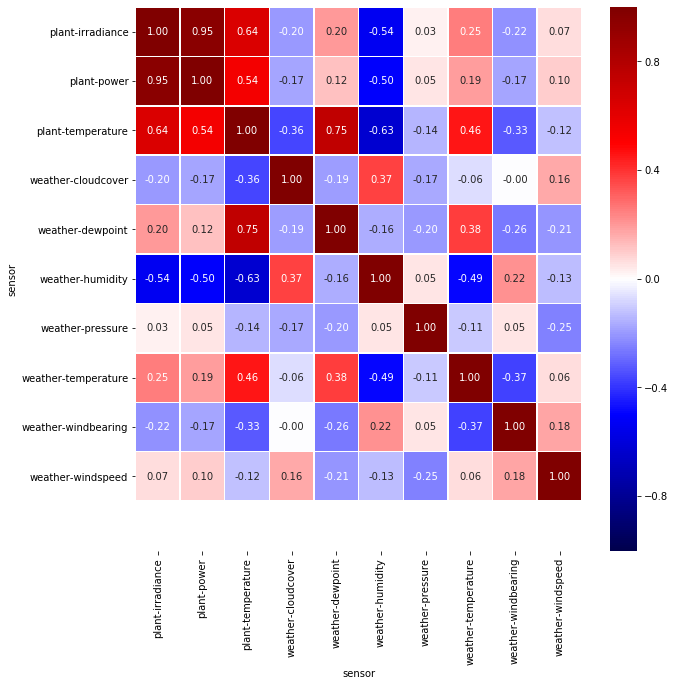

In [12]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=dfg[1].corr(), annot=True,fmt='3.2f',linewidths=.5,cmap='seismic',vmin=-1,vmax=1)
ax.set_ylim(len(dfg[1].columns)+1,0)

(11, 0)

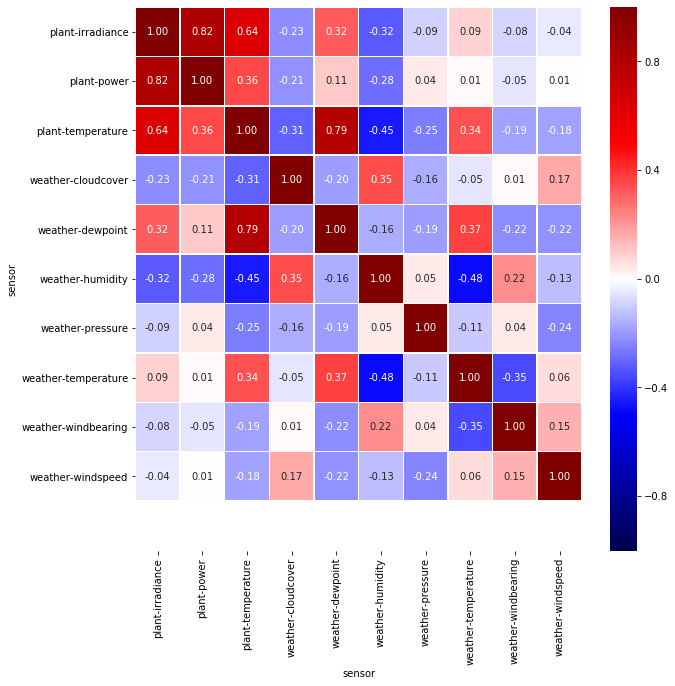

In [13]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=dfg[2].corr(), annot=True,fmt='3.2f',linewidths=.5,cmap='seismic',vmin=-1,vmax=1)
ax.set_ylim(len(dfg[1].columns)+1,0)

(11, 0)

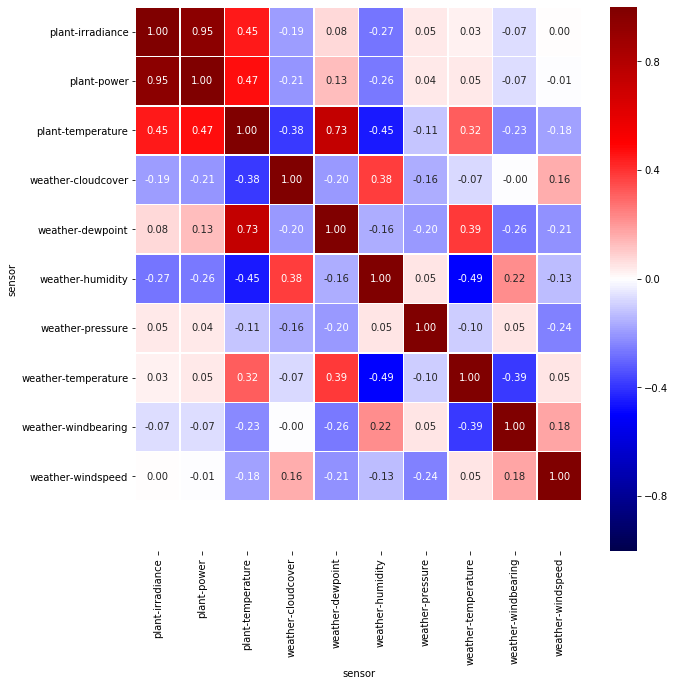

In [14]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=dfg[3].corr(), annot=True,fmt='3.2f',linewidths=.5,cmap='seismic',vmin=-1,vmax=1)
ax.set_ylim(len(dfg[1].columns)+1,0)

In [15]:
sensors = dfg.columns.get_level_values(1).unique()
sensors

Index(['plant-irradiance', 'plant-power', 'plant-temperature',
       'weather-cloudcover', 'weather-dewpoint', 'weather-humidity',
       'weather-pressure', 'weather-temperature', 'weather-windbearing',
       'weather-windspeed'],
      dtype='object', name='sensor')

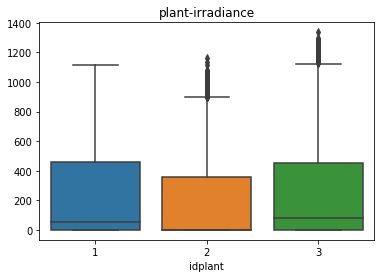

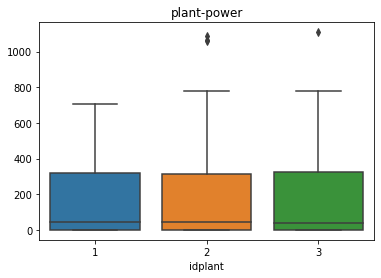

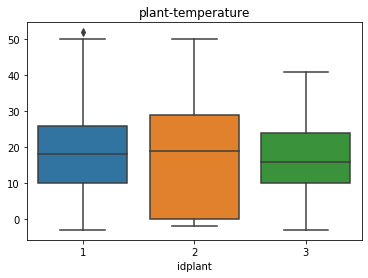

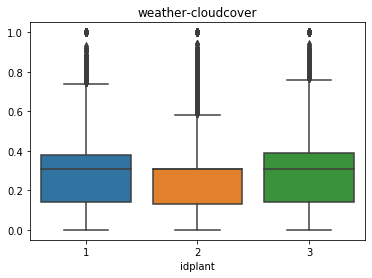

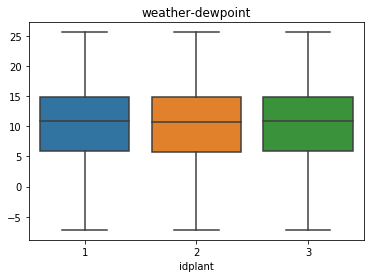

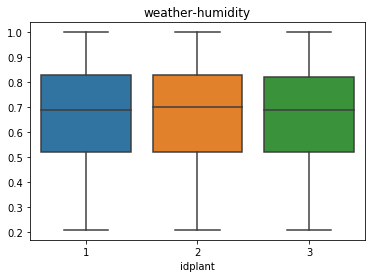

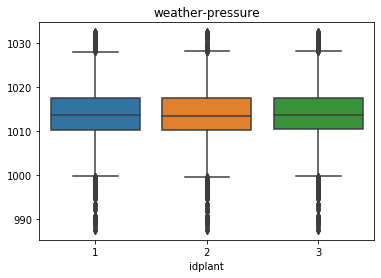

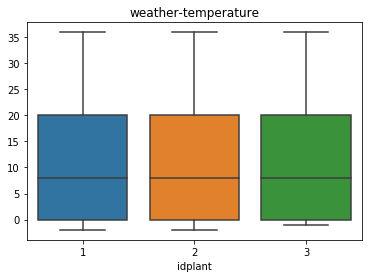

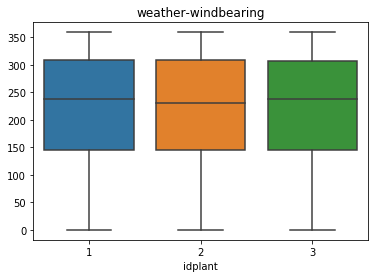

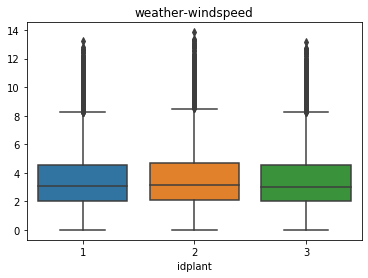

In [16]:
for s in sensors:
    sns.boxplot(data=dfg.swaplevel(axis=1)[s])
    plt.title(s)
    plt.show()

<Figure size 1296x432 with 0 Axes>

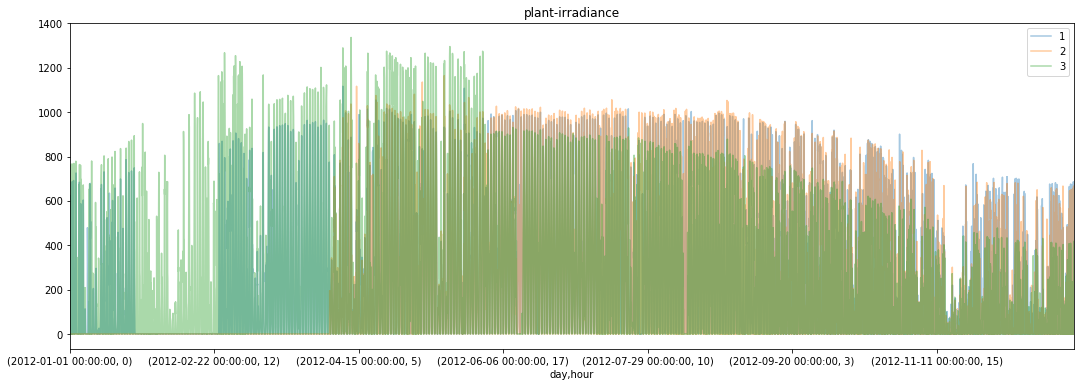

<Figure size 1296x432 with 0 Axes>

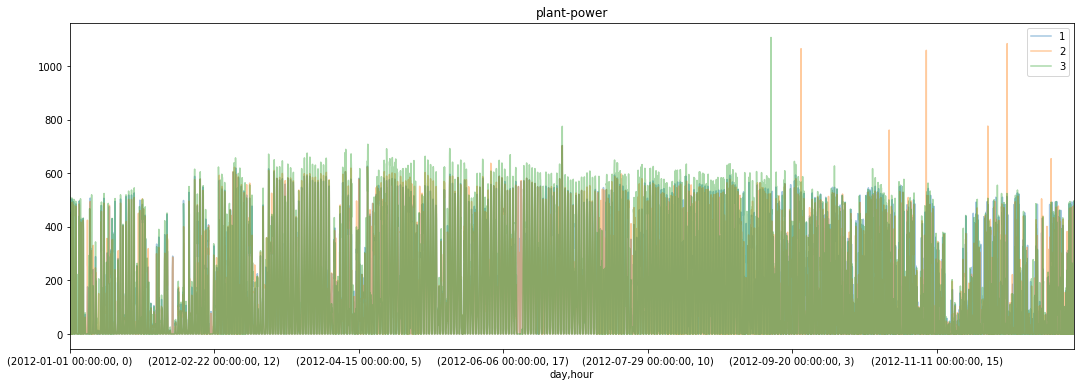

<Figure size 1296x432 with 0 Axes>

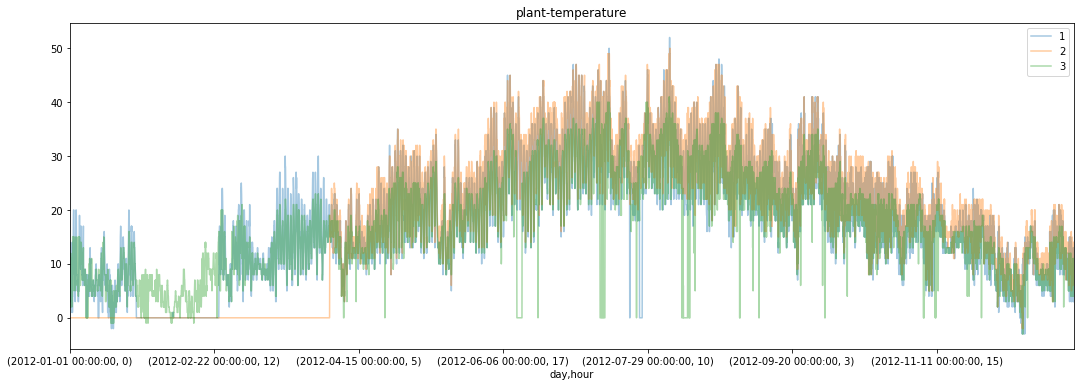

<Figure size 1296x432 with 0 Axes>

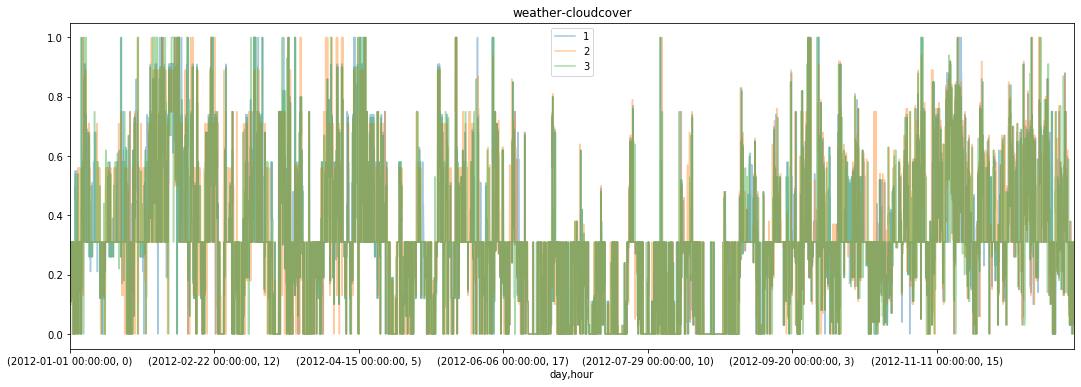

<Figure size 1296x432 with 0 Axes>

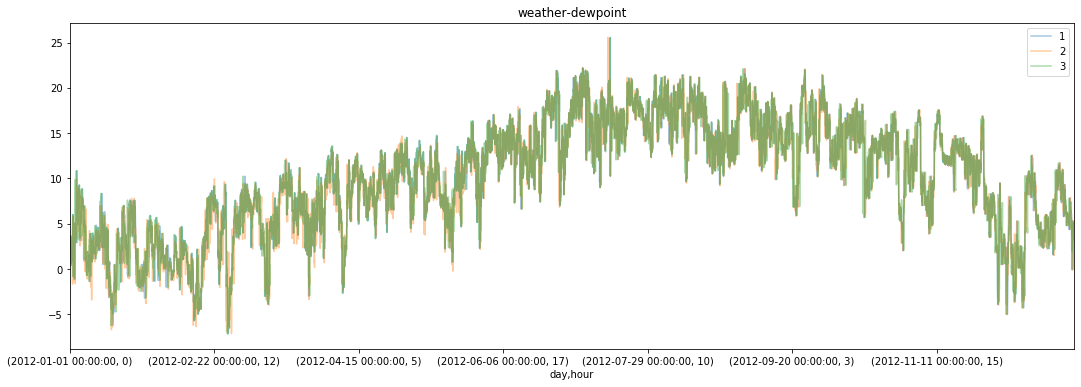

<Figure size 1296x432 with 0 Axes>

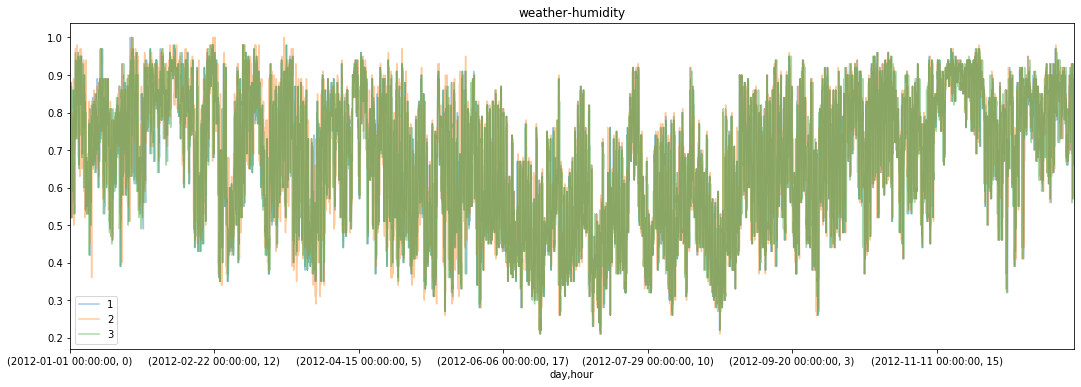

<Figure size 1296x432 with 0 Axes>

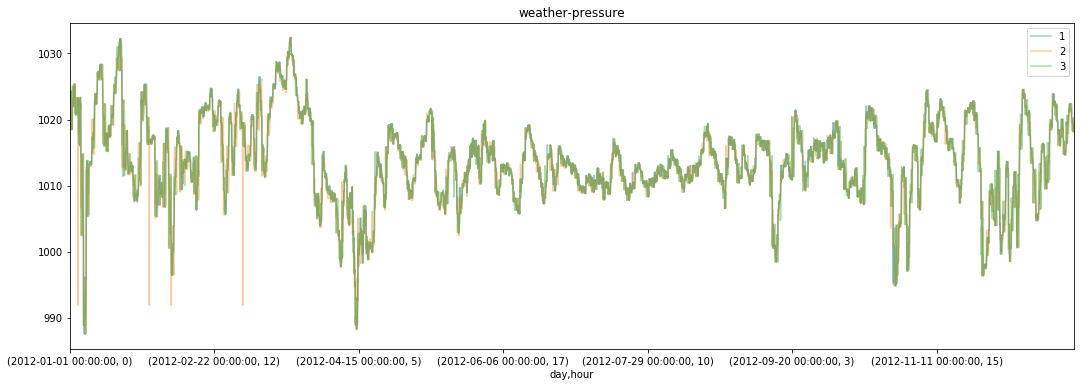

<Figure size 1296x432 with 0 Axes>

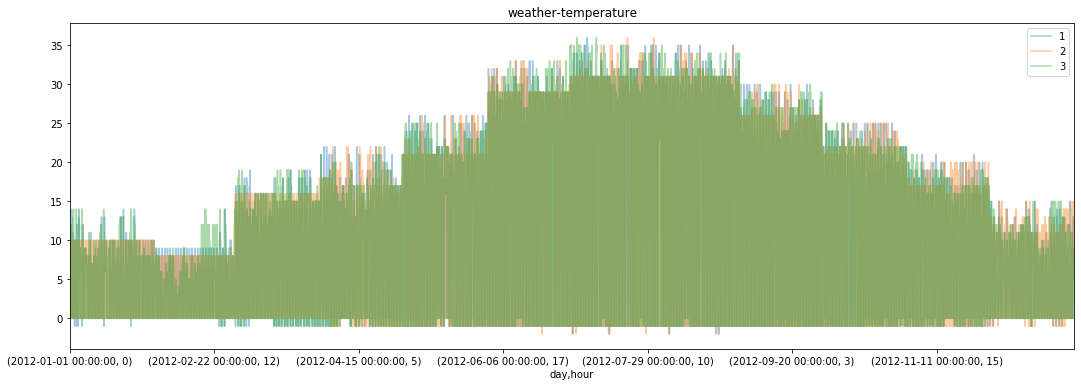

<Figure size 1296x432 with 0 Axes>

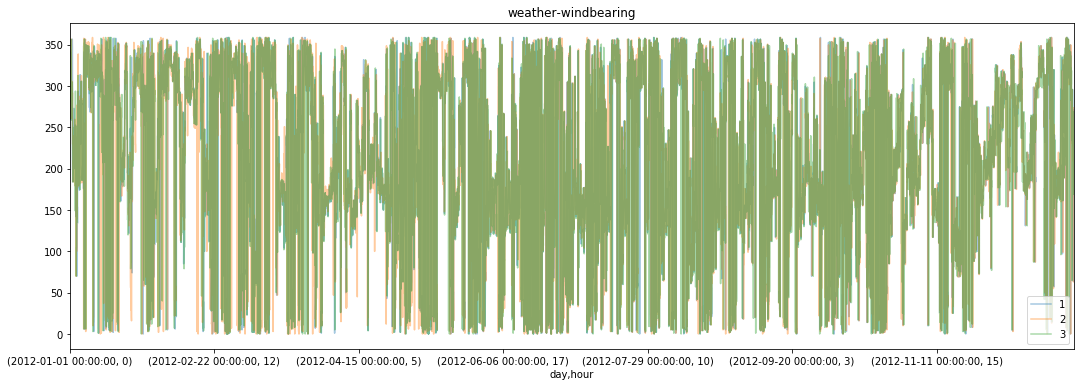

<Figure size 1296x432 with 0 Axes>

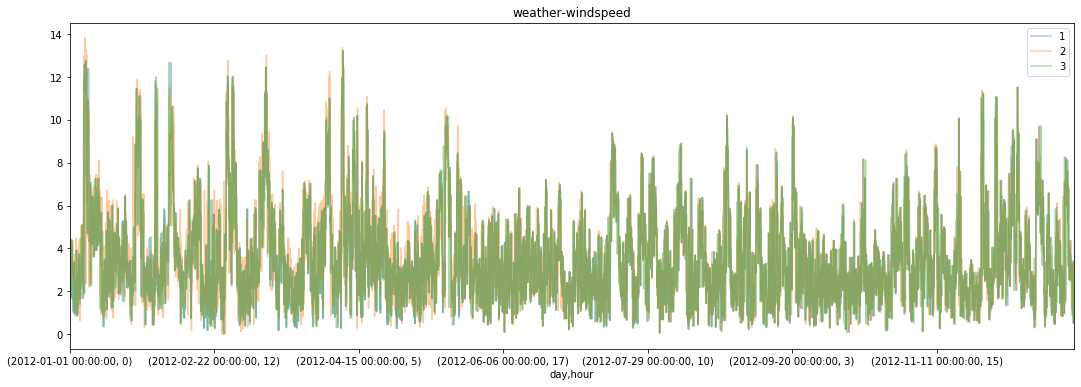

In [17]:
for s in sensors:
    plt.figure(figsize=(18,6))
    dfg.swaplevel(axis=1)[s].plot(alpha=0.4,figsize=(18,6))
#    dfg.swaplevel(axis=1)[s].mean(axis=1).plot(label='ave',figsize=(18,6))
    
    plt.title(s)
    plt.legend()
    plt.show()

### Ceanup plant-temperature
looks like there are a lot of fake zeros

<Figure size 1296x432 with 0 Axes>

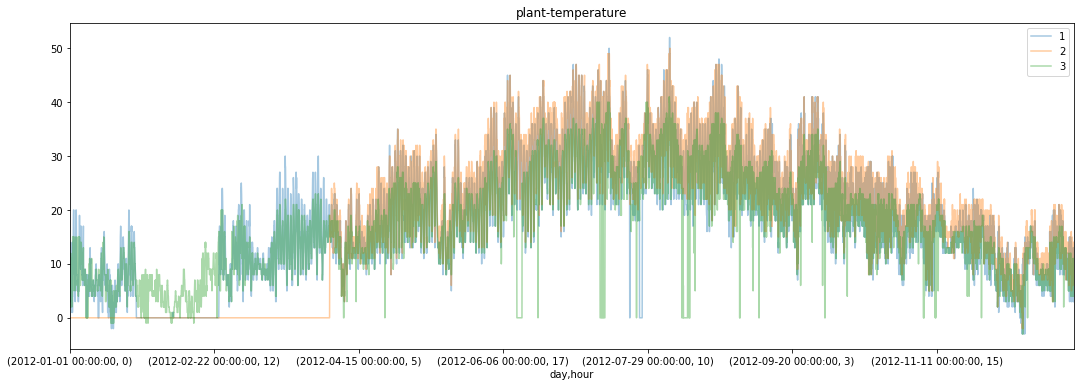

In [18]:
s = 'plant-temperature'
plt.figure(figsize=(18,6))
dfg.swaplevel(axis=1)[s].plot(alpha=0.4,figsize=(18,6))
plt.title(s)
plt.legend()
plt.show()

In [19]:
# if in tupla there is a zero, returns the average of the other 2
def de_zero(tupla):
    if min(tupla)==0:
        l = np.array(tupla)
        return np.sort(l)[1:].mean()
    else:
        return 0
    

In [20]:
s='plant-temperature'
new_values = dfg.swaplevel(axis=1)[s].apply(de_zero,axis=1)
# i cycles across all tuples (Datetime,hour) where at least one plant-temperature is zero
# i replace the zero with the average among the others to clean up the rather frequent fake zero temp. read
for i in dfg.swaplevel(axis=1)[s].loc[(dfg.swaplevel(axis=1)[s]==0).sum(axis=1).astype(bool)].index:
    plant_zero_t = dfg.loc[i].swaplevel().loc[s].idxmin()
    #print(i,dfg.loc[i,(plant_zero_t,s)],'becomes',new_values.loc[i])
    dfg.loc[i,(plant_zero_t,s)] = new_values.loc[i]

<Figure size 1296x432 with 0 Axes>

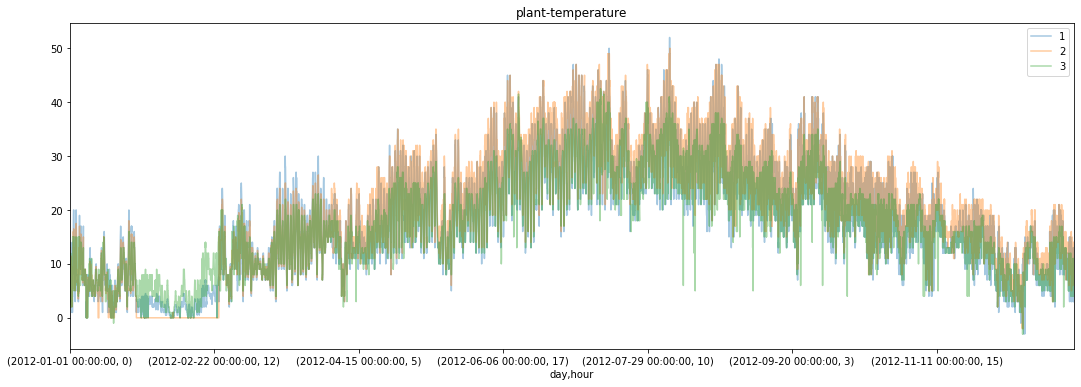

In [21]:
s = 'plant-temperature'
plt.figure(figsize=(18,6))
dfg.swaplevel(axis=1)[s].plot(alpha=0.4,figsize=(18,6))
plt.title(s)
plt.legend()
plt.show()

### weather-temperature looks bad as well

<Figure size 1296x432 with 0 Axes>

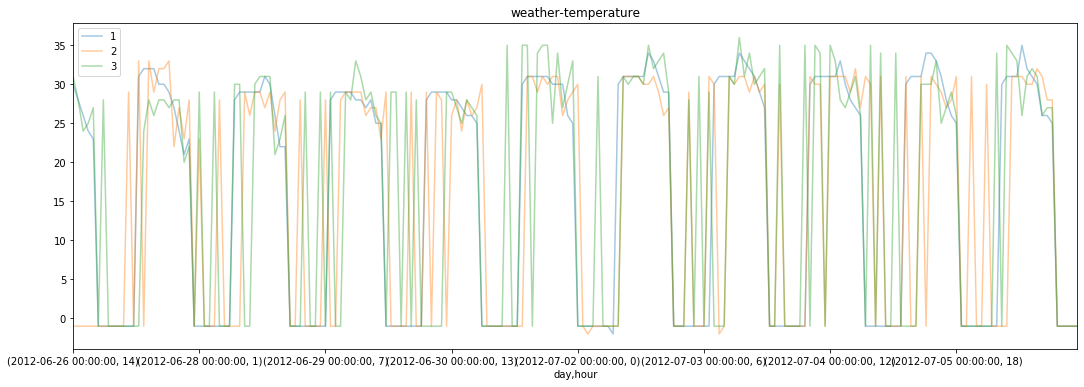

In [22]:
s='weather-temperature'
plt.figure(figsize=(18,6))
dfg.iloc[int((len(dfg)/2)-100):int((len(dfg)/2)+100)].swaplevel(axis=1)[s].plot(alpha=0.4,figsize=(18,6))
plt.title(s)
plt.legend()
plt.show()

In [23]:
new_temps = dfg.swaplevel(axis=1)[s].rolling(15).max().fillna(method='bfill')
for i in new_temps.index:
    for p in range(3):
        dfg.loc[i,(p+1,s)] = new_temps.loc[i,p+1]

<Figure size 1296x432 with 0 Axes>

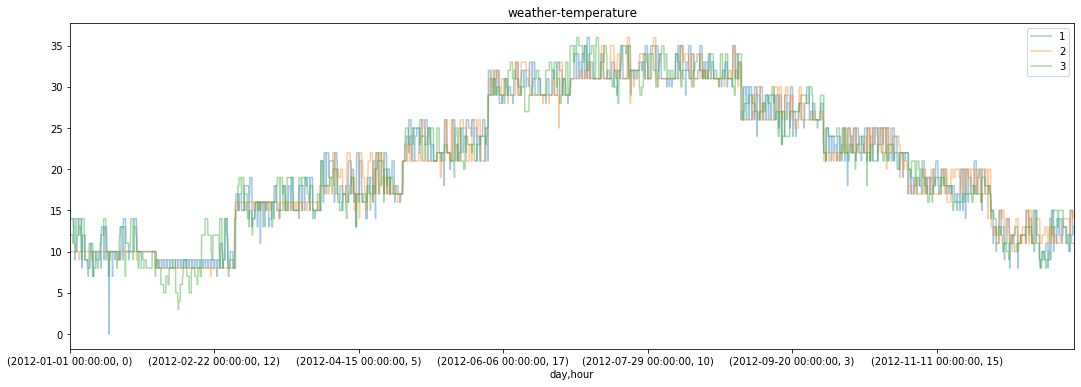

In [24]:
s='weather-temperature'
plt.figure(figsize=(18,6))
dfg.swaplevel(axis=1)[s].plot(alpha=0.4,figsize=(18,6))
plt.title(s)
plt.legend()
plt.show()

In [25]:
dfg.stack('idplant').to_csv('clean_dataset.csv')

## See if written csv is ok

In [26]:
pd.read_csv('clean_dataset.csv',parse_dates=['day'])

,day,hour,idplant,plant-irradiance,plant-power,plant-temperature,weather-cloudcover,weather-dewpoint,weather-humidity,weather-pressure,weather-temperature,weather-windbearing,weather-windspeed
0,2012-01-01,0,1,0.0,0.0,3.0,0.31,1.05,0.76,NaN,14.0,292.0,4.38
1,2012-01-01,0,2,0.0,152.0,4.5,0.13,2.16,0.65,1021.44,10.0,308.0,3.85
2,2012-01-01,0,3,174.0,109.0,6.0,0.16,2.14,0.52,1021.35,12.0,342.0,3.40
3,2012-01-01,1,1,0.0,0.0,3.0,0.24,1.09,0.75,1018.50,14.0,306.0,4.26
4,2012-01-01,1,2,0.0,307.0,2.5,0.31,2.67,0.55,1021.44,10.0,310.0,4.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20857,2012-12-31,17,2,0.0,0.0,7.0,0.05,3.58,0.84,1019.33,15.0,204.0,1.36
20858,2012-12-31,17,3,381.0,432.0,11.0,0.03,5.31,0.78,1019.51,11.0,240.0,1.19
20859,2012-12-31,18,1,33.0,6.0,3.0,0.05,3.24,0.88,1019.36,13.0,230.0,3.40
20860,2012-12-31,18,2,0.0,0.0,8.0,0.31,4.87,0.87,1018.12,15.0,205.0,0.73
